In [1]:
import tensorflow as tf
import numpy as np
import skimage.color

In [2]:
%load_ext autoreload
%autoreload 1
%aimport rr_graph
%aimport rr_generate_data

In [3]:
input_size = 128

In [4]:
sess = tf.InteractiveSession()

In [5]:
inputs, labels, output_pr, loss = rr_graph.build_graph(input_size=input_size, minibatch_size=1)

In [28]:
image, mask = rr_generate_data.random_road(height=input_size, width=input_size)
# image = skimage.color.rgb2gray(image_rgb)[np.newaxis, :, :, np.newaxis]
rr_generate_data.normal_distribution(image.astype(np.float32))

In [19]:
saver = tf.train.Saver()

In [20]:
saver.restore(sess, '/tmp/rr-detect-log/checkpoint-300')

In [29]:
feed = {inputs: image[np.newaxis, :, :, :]}
output_pr_value = sess.run(output_pr, feed_dict = feed)

In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt

[ 0.06211462]


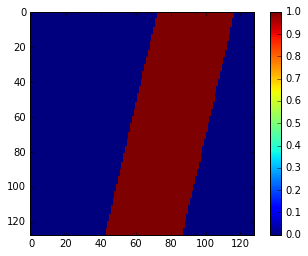

In [30]:
print(output_pr_value)
plt.imshow(image[:,:,0], interpolation='nearest')
plt.colorbar()